In [2]:
import torch
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

Using cache found in C:\Users\Sanskar/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-4-7 Python-3.12.2 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Sanskar/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


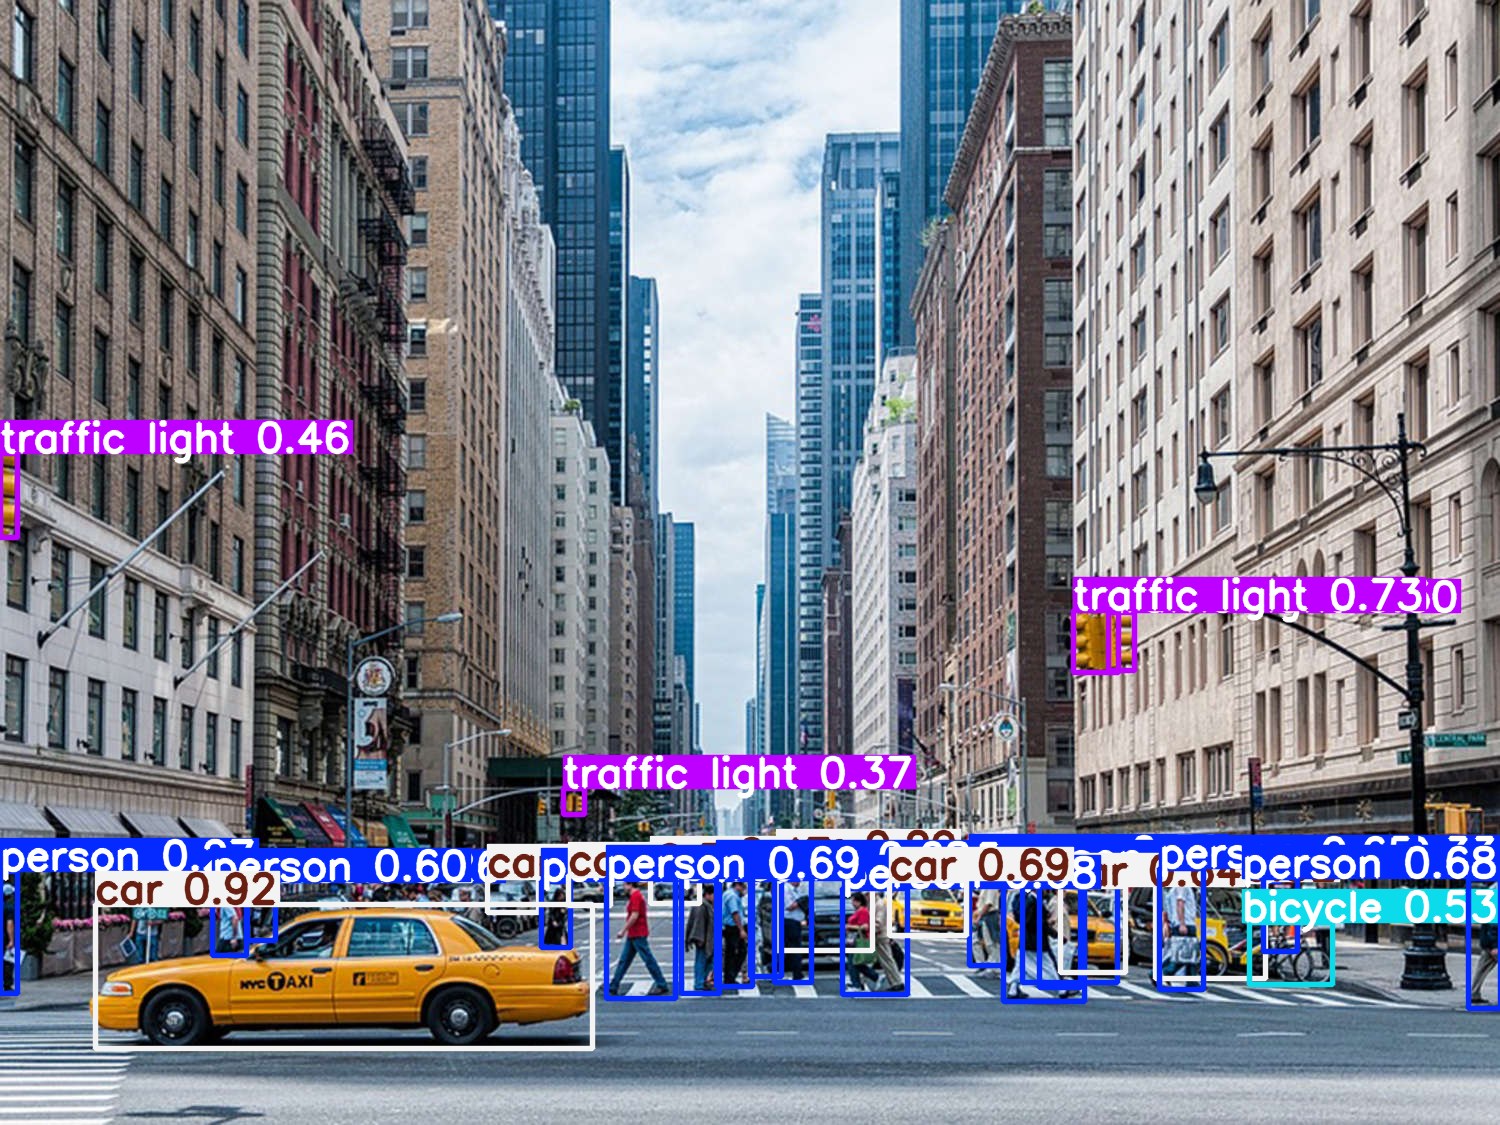

           xmin        ymin         xmax         ymax  confidence  class  \
0     95.323456  904.536255   592.673645  1048.681885    0.915953      2   
1   1073.838257  610.166016  1118.599121   672.383362    0.726431      9   
2    606.749695  878.583374   675.326599   998.047974    0.689193      0   
3    889.454224  880.316711   966.516052   935.159119    0.688354      2   
4    842.084290  888.724182   907.256409   994.713379    0.682695      0   
5   1468.537598  878.409973  1500.000000  1008.970215    0.681171      0   
6    716.265869  873.741272   752.020386   986.569458    0.676562      0   
7   1159.124023  868.286316  1203.591675   989.639038    0.650540      0   
8   1060.034058  886.822693  1125.745605   972.044678    0.640387      2   
9    681.519104  880.329590   719.200623   993.189087    0.617603      0   
10   212.751602  881.600281   246.521606   955.653748    0.598976      0   
11  1003.193542  873.836731  1084.493530  1001.647461    0.587729      0   
12   568.305

In [3]:
# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Correct repository
model.conf = 0.25  # Set confidence threshold

def detect_objects(image_path):
    """Detect objects in an image using YOLOv5."""
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found.")
        return None
    image = Image.open(image_path).convert("RGB")  # Ensure correct format
    results = model(image)  # Perform inference
    results.show()

    detections = results.pandas().xyxy[0]  # Get bounding boxes
    if detections.empty:
        print("No objects detected.")
        return None

    return detections

def plot_detections(image_path, detections):
    """Plot detected objects on the image."""
    if detections is None:
        print("No objects to plot.")
        return
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = f"{row['name']} ({row['confidence']:.2f})"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
        draw.text((x1, y1 - 10), label, fill="green", font=font)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    image_path = "D:/Master Folder/Desktop/download.jpg"  # Ensure this file exists in the working directory
    detections = detect_objects(image_path)
    if detections is not None:
        print(detections)
        plot_detections(image_path, detections)
